In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
folder = "/content/drive/My Drive/"

In [ ]:
import pickle
import gensim


In [ ]:
data = pickle.load(open(folder+"Btech-Major/image_vectors.p", "rb"))
word_vector = pickle.load(open(folder+"Major/word_vector_min_bird.p", "rb"))
model = gensim.models.KeyedVectors.load_word2vec_format(folder+'Major/GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
len(data)

11788

11840
11840
Black_Footed_Albatross_0001_796111.jpg
Black_Footed_Albatross_0001_796111.jpg
Black_Footed_Albatross_0002_55.jpg
Black_Footed_Albatross_0003_796136.jpg
Black_Footed_Albatross_0005_796090.jpg
Black_Footed_Albatross_0006_796065.jpg
Black_Footed_Albatross_0007_796138.jpg
Black_Footed_Albatross_0008_796083.jpg
Black_Footed_Albatross_0009_34.jpg


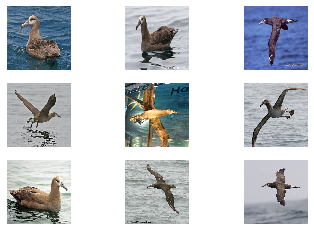

In [ ]:
import matplotlib.pyplot as pyplot
from keras.preprocessing.image import array_to_img
from numpy import expand_dims
from random import randint, choice

def random_flip(image):
  image = tf.image.flip_left_right(image)
  return image.numpy()

def random_jitter(image):

  image = expand_dims(image, 0) #add additional dimension necessary for zooming
  image = image_augmentation_generator.flow(image, batch_size=1)
  result = image[0].reshape(image[0].shape[1:]) #remove additional dimension (1, 64, 64, 3) to (64, 64, 3)
  return result

image_augmentation_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.8, 1.0]) # random zoom proves to be helpful in capturing more details https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

n = 227
image_embeddings = []
captions = []
labels = []
for i, k in enumerate(data.keys()):
  image_embeddings.append(data[k])
  captions.append(word_vector[k])
  labels.append(k)
  if i % n == 0:
   image_embeddings.append(random_jitter(data[k]))
   captions.append(word_vector[k])
   labels.append(k)

print(len(captions))
print(len(image_embeddings))

pyplot.axis('off')
slcie = image_embeddings[40:50]
for i in range(9):
  pyplot.subplot(3, 3, i+1)
  pyplot.imshow(array_to_img(slcie[i]))
  print(labels[i])
  pyplot.axis('off')

pyplot.show()

(-0.5, 63.5, 63.5, -0.5)

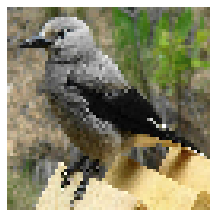

In [ ]:
# Show image in image embeddings

pyplot.figure(figsize=[8, 8])

pyplot.subplot(1, 2, 0+1)
pyplot.imshow(array_to_img(image_embeddings[5432]))
pyplot.axis('off')

In [ ]:
import numpy as np

def get_random_word_vectors_from_dataset(n_samples):
  ix = np.random.randint(0, len(captions), n_samples)
  return np.asarray(captions)[ix]


In [ ]:

def generate_random_vectors(n_samples):
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 300))
    for i in range(rnd):
      result_array = np.append(result_array, [model[choice(model.index2entity)]], axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)


In [ ]:
from keras.preprocessing.image import array_to_img

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy import asarray
import numpy as np

import os
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from numpy.random import random
from tensorflow.keras import layers
from tensorflow.keras import Model
from numpy.random import randn
from numpy.random import randint
import time
from keras.layers.advanced_activations import PReLU
from keras.utils.vis_utils import plot_model

# Discriminator model
def define_discriminator():
    word_vector_dim = 300
    dropout_prob = 0.4

    in_label = layers.Input(shape=(300,))

    n_nodes = 3 * 64 * 64
    li = layers.Dense(n_nodes)(in_label)
    li = layers.Reshape((64, 64, 3))(li)

    dis_input = layers.Input(shape=(64, 64, 3))

    merge = layers.Concatenate()([dis_input, li])

    discriminator = layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(merge)
    discriminator = layers.LeakyReLU(0.2)(discriminator)
    discriminator = layers.GaussianNoise(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU()(discriminator)

    discriminator = layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Flatten()(discriminator)

    discriminator = layers.Dense(1024)(discriminator)

    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Dense(1)(discriminator)

    discriminator_model = Model(inputs=[dis_input, in_label], outputs=discriminator)

    discriminator_model.summary()

    return discriminator_model


def resnet_block(model, kernel_size, filters, strides):
    gen = model
    model = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1, 2])(model)
    model = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = layers.Add()([gen, model])
    return model


# Generator model
def define_generator():
    kernel_init = tf.random_normal_initializer(stddev=0.02)
    batch_init = tf.random_normal_initializer(1., 0.02)

    random_input = layers.Input(shape=(100,))
    text_input1 = layers.Input(shape=(300,))
    text_layer1 = layers.Dense(8192)(text_input1)
    text_layer1 = layers.Reshape((8, 8, 128))(text_layer1)

    n_nodes = 128 * 8 * 8
    gen_input_dense = layers.Dense(n_nodes)(random_input)
    generator = layers.Reshape((8, 8, 128))(gen_input_dense)

    merge = layers.Concatenate()([generator, text_layer1])

    model = layers.Conv2D(filters=64, kernel_size=9, strides=1, padding="same")(merge)
    model = tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1, 2])(model)

    gen_model = model

    for _ in range(4):
      model = resnet_block(model, 3, 64, 1)

    model = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = layers.Add()([gen_model, model])

    model = layers.Conv2DTranspose(filters=512, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2D(3, (3, 3), padding='same', activation='tanh')(model)

    generator_model = Model(inputs=[random_input, text_input1], outputs=model)

    generator_model.summary()

    return generator_model

In [ ]:
from IPython.display import clear_output


def generate_latent_points(latent_dim, n_samples):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions = get_random_word_vectors_from_dataset(n_samples)
    return [x_input, text_captions]

def noisy_labels(y, p_flip):
    n_select = int(p_flip * int(y.shape[0]))
    flip_ix = np.random.choice([i for i in range(int(y.shape[0]))], size=n_select)

    op_list = []
    for i in range(int(y.shape[0])):
        if i in flip_ix:
            op_list.append(tf.subtract(1.0, y[i]))
        else:
            op_list.append(y[i])

    outputs = tf.stack(op_list)
    return outputs

def load_data():
    return asarray(image_embeddings), asarray(captions).astype('float32')

def smooth_positive_labels(y):
	return y - 0.3 + (np.random.random(y.shape) * 0.5)

def smooth_negative_labels(y):
	return y + np.random.random(y.shape) * 0.3

def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  print(predictions.shape)
  pyplot.figure(figsize=[7, 7])

  for i in range(predictions.shape[0]):
      pyplot.subplot(5, 5, i+1)
      pyplot.imshow(array_to_img(predictions.numpy()[i]))
      pyplot.axis('off')

  pyplot.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  pyplot.show()


def discriminator_loss(r_real_output_real_text, f_fake_output_real_text_1, f_real_output_fake_text):
   alpha = 0.5
   real_output_noise = smooth_positive_labels(noisy_labels(tf.ones_like(r_real_output_real_text), 0.10))
   fake_output_real_text_noise_1 = smooth_negative_labels(tf.zeros_like(f_fake_output_real_text_1))
   real_output_fake_text_noise = smooth_negative_labels(tf.zeros_like(f_real_output_fake_text))

   real_loss = tf.reduce_mean(binary_cross_entropy(real_output_noise, r_real_output_real_text))
   fake_loss_ms_1 = tf.reduce_mean(binary_cross_entropy(fake_output_real_text_noise_1, f_fake_output_real_text_1))
   fake_loss_2 = tf.reduce_mean(binary_cross_entropy(real_output_fake_text_noise, f_real_output_fake_text))

   total_loss = real_loss + alpha * fake_loss_2 + (1-alpha) * fake_loss_ms_1
   return total_loss

def generator_loss(f_fake_output_real_text):
   return tf.reduce_mean(binary_cross_entropy(tf.ones_like(f_fake_output_real_text), f_fake_output_real_text))

@tf.function
def train_step(images, epoch):

  #define half_batch
  latent_dim = 100
  n_batch = 64

  noise_1 = tf.random.normal([32, latent_dim])
  noise_2 = tf.random.normal([32, latent_dim])
  real_captions = images[1]
  real_images = images[0]

  random_captions = generate_random_vectors(n_batch)
  random_captions_1, random_captions_2  = tf.split(random_captions, 2, 0)
  real_captions_1, real_captions_2  = tf.split(real_captions, 2 ,0)
  real_images_1, real_images_2 = tf.split(real_images, 2, 0)

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

    noise = tf.concat([noise_1, noise_2], 0)

    generated_images = generator([noise, real_captions], training=True)

    fake_1, fake_2 = tf.split(generated_images, 2, 0)

    f_fake_output_real_text_1 = discriminator([fake_1, real_captions_1], training=True)
    f_fake_output_real_text_2 = discriminator([fake_2, real_captions_2], training=True)

    r_real_output_real_text_1 = discriminator([real_images_1, real_captions_1], training=True)
    r_real_output_real_text_2 = discriminator([real_images_2, real_captions_2], training=True)

    f_real_output_fake_text_1 = discriminator([real_images_1, random_captions_1], training=True)
    f_real_output_fake_text_2 = discriminator([real_images_2, random_captions_2], training=True)

    #### Calculating losses ####

    gen_loss = generator_loss(f_fake_output_real_text_1) + generator_loss(f_fake_output_real_text_2)
    # mode seeking loss
    lz = tf.math.reduce_mean(tf.math.abs(fake_2-fake_1)) / tf.math.reduce_mean(tf.math.abs(noise_2-noise_1))
    eps = 1 * 1e-5
    loss_lz = 1 / (eps+lz) * ms_loss_weight
    total_gen_loss = gen_loss + loss_lz

    tf.print('G_loss', [total_gen_loss])

    disc_loss_1 = discriminator_loss(r_real_output_real_text_1, f_fake_output_real_text_1, f_real_output_fake_text_1)
    disc_loss_2 = discriminator_loss(r_real_output_real_text_2, f_fake_output_real_text_2, f_real_output_fake_text_2)

    total_disc_loss = disc_loss_1 + disc_loss_2

    tf.print('D_loss', [total_disc_loss])

    #### Done calculating losses ####

  gradients_of_discriminator = disc_tape.gradient(total_disc_loss, discriminator.trainable_variables)

  gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))



def train(dataset, epochs = 2000):

  checkpoint_dir = '/content/drive/My Drive/checkpoints_2'
  checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
  checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                discriminator_optimizer=discriminator_optimizer,
                                  generator=generator,
                                  discriminator=discriminator)

  ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)
  if ckpt_manager.latest_checkpoint:
    checkpoint.restore(ckpt_manager.latest_checkpoint)  #ckpt_manager.checkpoints[3]
    print ('Latest checkpoint restored!!')

  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch, epoch)

    if (epoch +1) % 10 == 0:
      [z_input, labels_input] = generate_latent_points(100, 25)
      generate_and_save_images(generator,
                            epoch + 1,
                             [z_input, labels_input])

    if (epoch + 1) % 40 == 0:
      ckpt_save_path = ckpt_manager.save()
      print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,ckpt_save_path))

    if (epoch +1) % 60 == 0:

      clear_output(wait=True)
      generator.save('/content/drive/My Drive/46stage_new_gan_animal_model_%03d.h5' % (epoch + 1))

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

ms_loss_weight = 1.0

binary_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.000035, beta_1 = 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.000035, beta_1 = 0.5)

discriminator = define_discriminator()
generator = define_generator()

images, lbs = load_data()
BUFFER_SIZE = images.shape[0]
BATCH_SIZE = 64
epo = 10

train_dataset = tf.data.Dataset.from_tensor_slices((images,lbs)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

train(train_dataset,epo)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 12288)        3698688     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 reshape (Reshape)              (None, 64, 64, 3)    0           ['dense[0][0]']                  
                                                                                              

KeyboardInterrupt: ignored

In [ ]:
generator.save(folder+'Major/46stage_new_gan_animal_model.h5' )
discriminator.save(folder+"Major/46stage_new_dis_animal_model.h5")



/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[  535  9195 11575   524  8959  1747  6725  9855  6140]
0 Red_Winged_Blackbird_0088_4007.jpg
1 White_Eyed_Vireo_0110_158947.jpg
2 House_Wren_0098_187368.jpg
3 Red_Winged_Blackbird_0064_4936.jpg
4 Blue_Headed_Vireo_0105_156229.jpg
5 Black_Billed_Cuckoo_0071_26288.jpg
6 Brewer_Sparrow_0032_796702.jpg
7 Hooded_Warbler_0104_164982.jpg
8 Whip_Poor_Will_0021_796426.jpg
(9, 64, 64, 3)


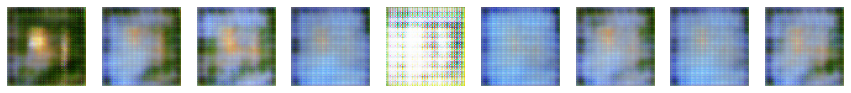

[ 6499  9230  1760  3071  4252  3086  6826 10174   915]
0 Loggerhead_Shrike_0065_104856.jpg
1 Yellow_Throated_Vireo_0023_159584.jpg
2 Black_Billed_Cuckoo_0087_795300.jpg
3 Western_Grebe_0088_36428.jpg
4 Blue_Jay_0068_61543.jpg
5 Blue_Grosbeak_0010_37108.jpg
6 Clay_Colored_Sparrow_0009_797256.jpg
7 Orange_Crowned_Warbler_0006_167998.jpg
8 Cardinal_0029_17297.jpg
(9, 64, 64, 3)


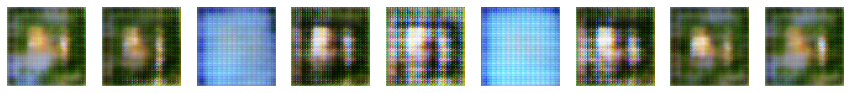

[5906 9896 1526 6002 4006 8853 9679 7501 9006]
0 White_Pelican_0034_97466.jpg
1 Kentucky_Warbler_0036_795872.jpg
2 Shiny_Cowbird_0083_796834.jpg
3 Sayornis_0003_98618.jpg
4 Rufous_Hummingbird_0075_59619.jpg
5 Sage_Thrasher_0093_155501.jpg
6 Cerulean_Warbler_0080_163399.jpg
7 Seaside_Sparrow_0028_120766.jpg
8 Philadelphia_Vireo_0046_794798.jpg
(9, 64, 64, 3)


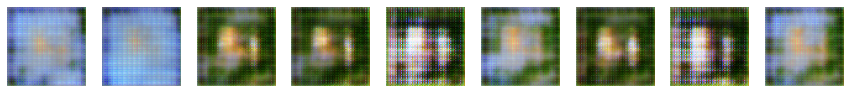

[11419  2332  1220   515  9038 10046   318  9570  5295]
0 Bewick_Wren_0139_184839.jpg
1 Scissor_Tailed_Flycatcher_0072_42085.jpg
2 Chuck_Will_Widow_0042_796983.jpg
3 Red_Winged_Blackbird_0052_5575.jpg
4 Red_Eyed_Vireo_0019_156921.jpg
5 Mourning_Warbler_0077_166567.jpg
6 Least_Auklet_0052_795088.jpg
7 Canada_Warbler_0121_162310.jpg
8 Mockingbird_0010_79955.jpg
(9, 64, 64, 3)


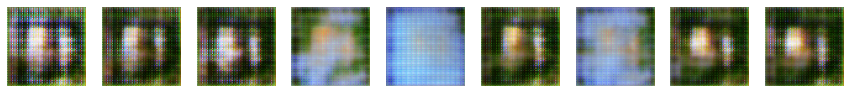

[ 9695  7664  5659  3773  4151  1846  5437  3474 10270]
0 Chestnut_Sided_Warbler_0005_164061.jpg
1 Vesper_Sparrow_0007_125630.jpg
2 Orchard_Oriole_0019_91338.jpg
3 Slaty_Backed_Gull_0056_796013.jpg
4 Long_Tailed_Jaeger_0066_60921.jpg
5 Yellow_Billed_Cuckoo_0038_26912.jpg
6 Clark_Nutcracker_0082_85477.jpg
7 Glaucous_Winged_Gull_0081_45223.jpg
8 Palm_Warbler_0086_169676.jpg
(9, 64, 64, 3)


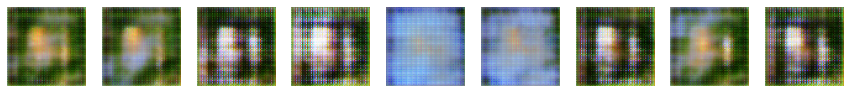

[4784 4089 4137 1896 2226 7947 8626 9560 3169]
0 Ringed_Kingfisher_0050_73002.jpg
1 Green_Violetear_0108_795711.jpg
2 Long_Tailed_Jaeger_0051_797095.jpg
3 Gray_Crowned_Rosy_Finch_0023_797288.jpg
4 Least_Flycatcher_0077_30296.jpg
5 Bank_Swallow_0053_129501.jpg
6 Least_Tern_0014_153757.jpg
7 Canada_Warbler_0105_162372.jpg
8 Evening_Grosbeak_0053_38005.jpg
(9, 64, 64, 3)


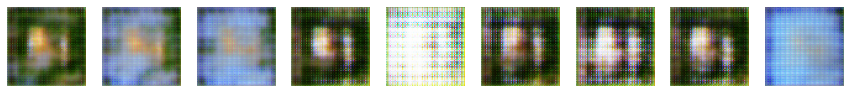

[1687  355 6885 7232 4678 9708 7151  423 8031]
0 Fish_Crow_0056_25851.jpg
1 Parakeet_Auklet_0045_795953.jpg
2 House_Sparrow_0007_111029.jpg
3 Henslow_Sparrow_0099_796567.jpg
4 Green_Kingfisher_0070_71387.jpg
5 Chestnut_Sided_Warbler_0037_164233.jpg
6 Harris_Sparrow_0048_116405.jpg
7 Rhinoceros_Auklet_0049_797543.jpg
8 Cliff_Swallow_0023_134314.jpg
(9, 64, 64, 3)


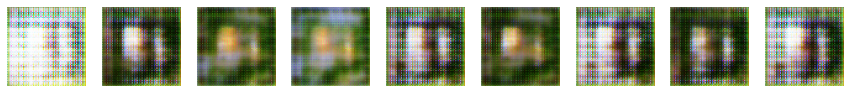

[ 4032 10973 10259  8284  7668  7556  1048  4937  7483]
0 Rufous_Hummingbird_0130_59500.jpg
1 Cedar_Waxwing_0043_178321.jpg
2 Palm_Warbler_0061_169954.jpg
3 Artic_Tern_0048_142372.jpg
4 Vesper_Sparrow_0015_125653.jpg
5 Song_Sparrow_0044_121931.jpg
6 Gray_Catbird_0113_21270.jpg
7 Horned_Lark_0020_73914.jpg
8 Seaside_Sparrow_0005_796516.jpg
(9, 64, 64, 3)


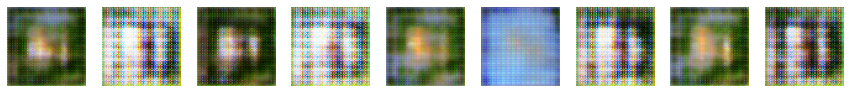

[9798   25 4207 6222 2769 9576 5090   86 1468]
0 Golden_Winged_Warbler_0076_164591.jpg
1 Black_Footed_Albatross_0039_796132.jpg
2 Pomarine_Jaeger_0071_795769.jpg
3 Horned_Puffin_0074_100886.jpg
4 European_Goldfinch_0090_794648.jpg
5 Cape_May_Warbler_0007_163087.jpg
6 Mallard_0098_77490.jpg
7 Laysan_Albatross_0050_870.jpg
8 Bronzed_Cowbird_0092_796215.jpg
(9, 64, 64, 3)


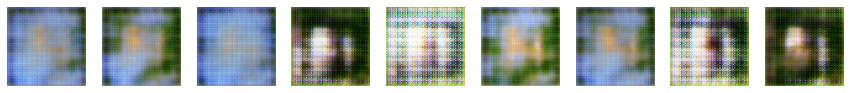

[ 7861   673  8656  6416  5342  2070  7284 11198 11379]
0 Cape_Glossy_Starling_0033_129435.jpg
1 Bobolink_0027_10569.jpg
2 Least_Tern_0082_154396.jpg
3 Geococcyx_0012_104352.jpg
4 Mockingbird_0096_79878.jpg
5 Acadian_Flycatcher_0012_795612.jpg
6 Le_Conte_Sparrow_0073_117127.jpg
7 Red_Cockaded_Woodpecker_0021_182647.jpg
8 Bewick_Wren_0052_184760.jpg
(9, 64, 64, 3)


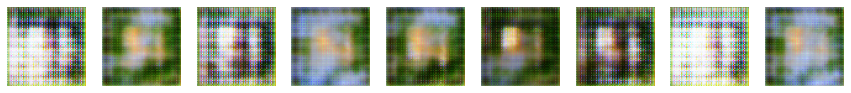

[ 8926  9113  7478  5891  7558  7643   224  5267 11359]
0 Blue_Headed_Vireo_0026_156245.jpg
1 Warbling_Vireo_0053_158675.jpg
2 Savannah_Sparrow_0139_119444.jpg
3 White_Pelican_0005_95916.jpg
4 Song_Sparrow_0046_121903.jpg
5 Tree_Sparrow_0100_122945.jpg
6 Groove_Billed_Ani_0080_1549.jpg
7 Red_Breasted_Merganser_0056_79348.jpg
8 Bewick_Wren_0003_185072.jpg
(9, 64, 64, 3)


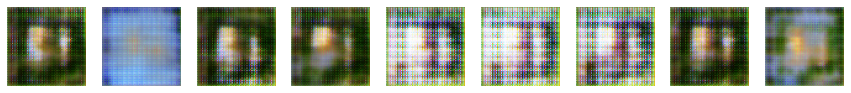

[  752  5148  8280  8618  9887  8502  3643  4400 10779]
0 Indigo_Bunting_0041_13987.jpg
1 Western_Meadowlark_0095_78568.jpg
2 Artic_Tern_0041_142079.jpg
3 Forsters_Tern_0125_151399.jpg
4 Kentucky_Warbler_0022_795882.jpg
5 Elegant_Tern_0005_150708.jpg
6 Ivory_Gull_0043_49755.jpg
7 Dark_Eyed_Junco_0015_66576.jpg
8 Northern_Waterthrush_0022_177003.jpg
(9, 64, 64, 3)


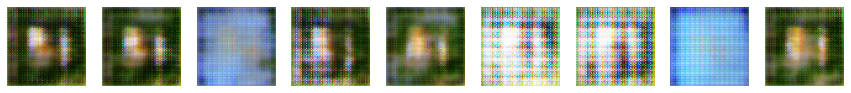

[10214  5406  8608 11097  8156  6750  8765  8430  6278]
0 Orange_Crowned_Warbler_0087_168439.jpg
1 Nighthawk_0087_82280.jpg
2 Forsters_Tern_0099_152529.jpg
3 Pileated_Woodpecker_0081_180249.jpg
4 Scarlet_Tanager_0040_137885.jpg
5 Brewer_Sparrow_0065_107419.jpg
6 Brown_Thrasher_0051_155344.jpg
7 Caspian_Tern_0109_145948.jpg
8 Common_Raven_0099_102534.jpg
(9, 64, 64, 3)


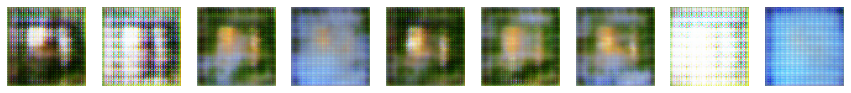

[5552    1 4696 8693 1210 7644 9728 5367 7044]
0 Baltimore_Oriole_0056_88355.jpg
1 Black_Footed_Albatross_0001_796111.jpg
2 Pied_Kingfisher_0011_72143.jpg
3 Green_Tailed_Towhee_0021_797404.jpg
4 Chuck_Will_Widow_0031_796981.jpg
5 Tree_Sparrow_0101_124104.jpg
6 Chestnut_Sided_Warbler_0081_163854.jpg
7 Nighthawk_0028_82636.jpg
8 Fox_Sparrow_0110_115172.jpg
(9, 64, 64, 3)


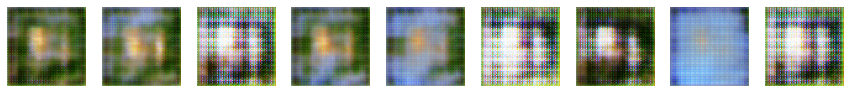

[ 6558  5838 10812  6309  6865  2731  9159  9359  6192]
0 Great_Grey_Shrike_0045_797047.jpg
1 Brown_Pelican_0017_94383.jpg
2 Northern_Waterthrush_0080_177080.jpg
3 White_Necked_Raven_0023_797371.jpg
4 Clay_Colored_Sparrow_0083_110734.jpg
5 European_Goldfinch_0020_794644.jpg
6 White_Eyed_Vireo_0018_159450.jpg
7 Black_And_White_Warbler_0065_160111.jpg
8 Horned_Puffin_0033_100731.jpg
(9, 64, 64, 3)


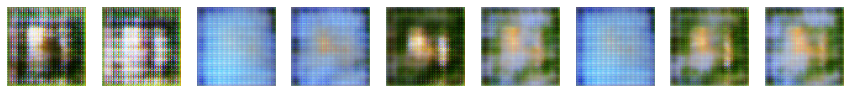

[1232 1378 1887 8585 2244 2876 8323 5744 9871]
0 Chuck_Will_Widow_0055_796973.jpg
1 Pelagic_Cormorant_0046_23588.jpg
2 Gray_Crowned_Rosy_Finch_0010_27039.jpg
3 Forsters_Tern_0062_151780.jpg
4 Olive_Sided_Flycatcher_0008_30686.jpg
5 Eared_Grebe_0052_34205.jpg
6 Black_Tern_0009_144046.jpg
7 Scott_Oriole_0051_795807.jpg
8 Hooded_Warbler_0134_164708.jpg
(9, 64, 64, 3)


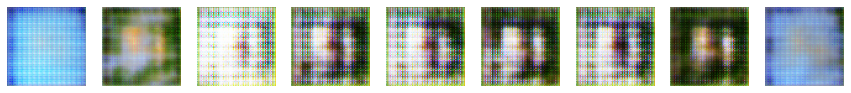

[11484  4824 10749 11359  4214  3763  6510  1648  2965]
0 Carolina_Wren_0011_186871.jpg
1 White_Breasted_Kingfisher_0023_73230.jpg
2 Yellow_Warbler_0088_176336.jpg
3 Bewick_Wren_0003_185072.jpg
4 Pomarine_Jaeger_0080_795751.jpg
5 Slaty_Backed_Gull_0035_796026.jpg
6 Loggerhead_Shrike_0091_105076.jpg
7 American_Crow_0139_25186.jpg
8 Pied_Billed_Grebe_0007_35399.jpg
(9, 64, 64, 3)


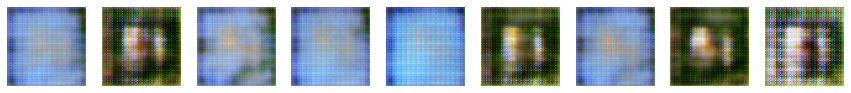

[1427 5945 9663 6877 7028 2017 7849 7762 5574]
0 Bronzed_Cowbird_0023_24058.jpg
1 Western_Wood_Pewee_0008_795043.jpg
2 Cerulean_Warbler_0047_797211.jpg
3 Clay_Colored_Sparrow_0104_110699.jpg
4 Fox_Sparrow_0068_114967.jpg
5 Northern_Flicker_0050_28284.jpg
6 Cape_Glossy_Starling_0016_129464.jpg
7 White_Crowned_Sparrow_0101_127058.jpg
8 Baltimore_Oriole_0104_86979.jpg
(9, 64, 64, 3)


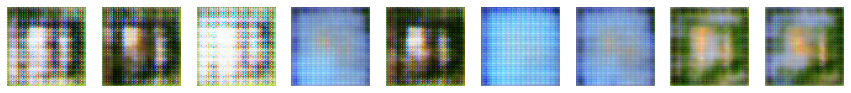

[10654  8263  3730  9680 11096  6474  8490  1794  3831]
0 Worm_Eating_Warbler_0012_795515.jpg
1 Artic_Tern_0012_143410.jpg
2 Ring_Billed_Gull_0108_51108.jpg
3 Cerulean_Warbler_0081_797179.jpg
4 Pileated_Woodpecker_0080_180589.jpg
5 Loggerhead_Shrike_0011_104921.jpg
6 Common_Tern_0100_149541.jpg
7 Mangrove_Cuckoo_0026_794609.jpg
8 Western_Gull_0087_54193.jpg
(9, 64, 64, 3)


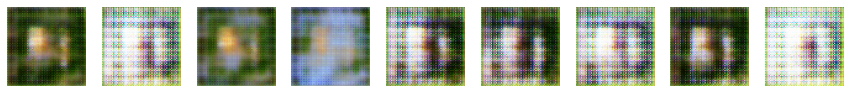

[ 4787  9030  7959  6516  3287   367  6563 11526  9360]
0 Ringed_Kingfisher_0053_72875.jpg
1 Philadelphia_Vireo_0085_794757.jpg
2 Bank_Swallow_0069_129802.jpg
3 Loggerhead_Shrike_0109_105710.jpg
4 Rose_Breasted_Grosbeak_0047_39407.jpg
5 Parakeet_Auklet_0065_795969.jpg
6 Great_Grey_Shrike_0054_106768.jpg
7 Carolina_Wren_0102_186332.jpg
8 Black_And_White_Warbler_0070_160354.jpg
(9, 64, 64, 3)


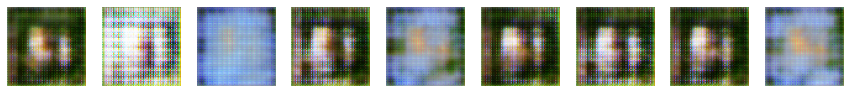

[4035 3921 7827 9973 3933 9619 8693 6084  438]
0 Green_Violetear_0003_795662.jpg
1 Ruby_Throated_Hummingbird_0013_57212.jpg
2 White_Throated_Sparrow_0109_129066.jpg
3 Magnolia_Warbler_0102_165884.jpg
4 Ruby_Throated_Hummingbird_0048_57222.jpg
5 Cape_May_Warbler_0101_163169.jpg
6 Green_Tailed_Towhee_0021_797404.jpg
7 American_Pipit_0045_99687.jpg
8 Brewer_Blackbird_0027_2329.jpg
(9, 64, 64, 3)


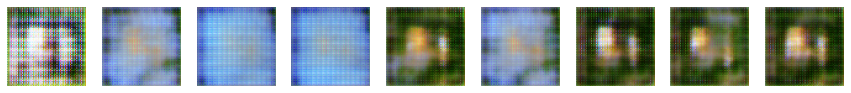

[ 1001 11770  9994  7787  2590  6718 10450  2044  5837]
0 Spotted_Catbird_0048_796817.jpg
1 Winter_Wren_0122_189475.jpg
2 Mourning_Warbler_0007_166500.jpg
3 White_Throated_Sparrow_0017_128982.jpg
4 Northern_Fulmar_0081_43912.jpg
5 Brewer_Sparrow_0023_107489.jpg
6 Prothonotary_Warbler_0084_173939.jpg
7 Northern_Flicker_0106_28441.jpg
8 Brown_Pelican_0013_93589.jpg
(9, 64, 64, 3)


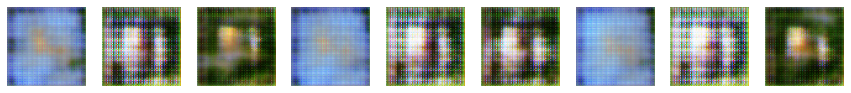

[10441   351  9692  7474  2886  3063  9489 11114  1988]
0 Prothonotary_Warbler_0070_174650.jpg
1 Parakeet_Auklet_0040_795974.jpg
2 Cerulean_Warbler_0094_797200.jpg
3 Savannah_Sparrow_0132_119962.jpg
4 Eared_Grebe_0064_34251.jpg
5 Western_Grebe_0075_36435.jpg
6 Blue_Winged_Warbler_0057_162085.jpg
7 Pileated_Woodpecker_0118_180138.jpg
8 Purple_Finch_0110_27750.jpg
(9, 64, 64, 3)


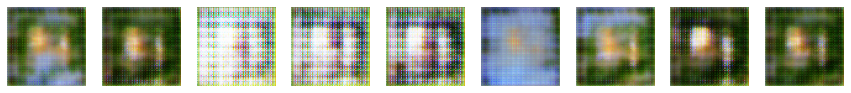

[ 9070 11059 10930  2729   545  6405  7144 10513  8402]
0 Red_Eyed_Vireo_0079_158198.jpg
1 American_Three_Toed_Woodpecker_0050_796186.jpg
2 Bohemian_Waxwing_0091_796634.jpg
3 European_Goldfinch_0014_794672.jpg
4 Red_Winged_Blackbird_0109_4454.jpg
5 American_Redstart_0120_103089.jpg
6 Harris_Sparrow_0035_116529.jpg
7 Swainson_Warbler_0040_794860.jpg
8 Caspian_Tern_0049_145755.jpg
(9, 64, 64, 3)


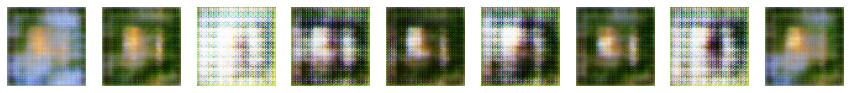

[ 9267  7965  6988  6288  3166  2690   874 11368  1219]
0 Yellow_Throated_Vireo_0079_159576.jpg
1 Barn_Swallow_0013_131812.jpg
2 Field_Sparrow_0118_113416.jpg
3 Common_Raven_0129_102094.jpg
4 Evening_Grosbeak_0046_37280.jpg
5 American_Goldfinch_0082_31890.jpg
6 Painted_Bunting_0066_15241.jpg
7 Bewick_Wren_0025_184932.jpg
8 Chuck_Will_Widow_0041_796997.jpg
(9, 64, 64, 3)


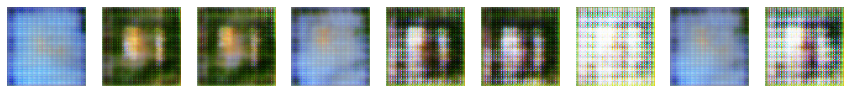

[11417   284  6800 10090  5568 10328 10861  4379  5183]
0 Bewick_Wren_0132_184906.jpg
1 Least_Auklet_0004_795112.jpg
2 Chipping_Sparrow_0070_108281.jpg
3 Myrtle_Warbler_0077_166749.jpg
4 Baltimore_Oriole_0090_87054.jpg
5 Pine_Warbler_0085_170981.jpg
6 Louisiana_Waterthrush_0048_795277.jpg
7 Green_Jay_0102_65813.jpg
8 Hooded_Merganser_0023_796784.jpg
(9, 64, 64, 3)


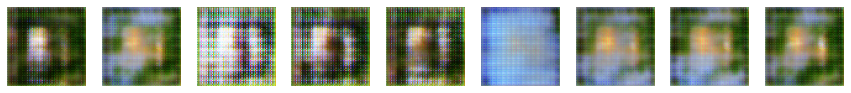

[ 1332  4647  7301  7446  1933  3947  2843 11061  8647]
0 Red_Faced_Cormorant_0054_796301.jpg
1 Green_Kingfisher_0018_71189.jpg
2 Lincoln_Sparrow_0009_117535.jpg
3 Savannah_Sparrow_0058_118323.jpg
4 Gray_Crowned_Rosy_Finch_0074_27156.jpg
5 Ruby_Throated_Hummingbird_0077_57858.jpg
6 Eared_Grebe_0004_34277.jpg
7 Pileated_Woodpecker_0004_180307.jpg
8 Least_Tern_0052_154021.jpg
(9, 64, 64, 3)


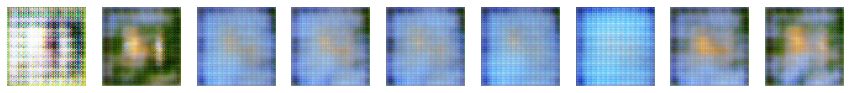

[6882  498 3986 5798 9230 2921 8329 7522 2188]
0 House_Sparrow_0004_111989.jpg
1 Red_Winged_Blackbird_0021_3767.jpg
2 Rufous_Hummingbird_0025_59461.jpg
3 Ovenbird_0059_92470.jpg
4 Yellow_Throated_Vireo_0023_159584.jpg
5 Horned_Grebe_0046_34926.jpg
6 Black_Tern_0017_143876.jpg
7 Seaside_Sparrow_0050_796508.jpg
8 Least_Flycatcher_0011_30222.jpg
(9, 64, 64, 3)


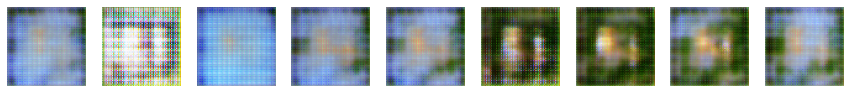

[ 4986  6125  9838  4413  1391 10286   421 11254  9167]
0 Horned_Lark_0141_74396.jpg
1 Whip_Poor_Will_0005_796425.jpg
2 Hooded_Warbler_0053_164631.jpg
3 Dark_Eyed_Junco_0044_68213.jpg
4 Pelagic_Cormorant_0073_23785.jpg
5 Palm_Warbler_0116_170319.jpg
6 Rhinoceros_Auklet_0046_797532.jpg
7 Red_Headed_Woodpecker_0029_183337.jpg
8 White_Eyed_Vireo_0033_159079.jpg
(9, 64, 64, 3)


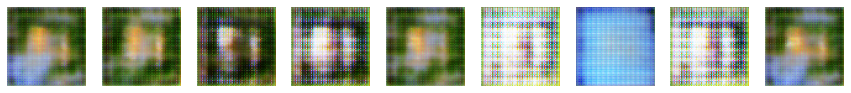

[6564 9323 8609  146 4803 4325 2428 1005 8634]
0 Great_Grey_Shrike_0055_106858.jpg
1 Bay_Breasted_Warbler_0097_159974.jpg
2 Forsters_Tern_0100_151774.jpg
3 Sooty_Albatross_0036_796387.jpg
4 Ringed_Kingfisher_0083_73053.jpg
5 Florida_Jay_0097_64906.jpg
6 Yellow_Bellied_Flycatcher_0009_795510.jpg
7 Gray_Catbird_0007_20186.jpg
8 Least_Tern_0029_154064.jpg
(9, 64, 64, 3)


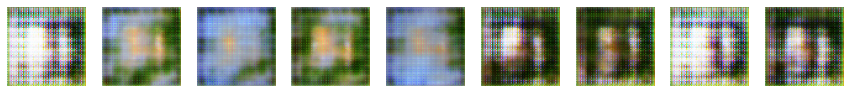

[4841 4948 3519 8514 4947 8012 9773 9215 9250]
0 White_Breasted_Kingfisher_0054_73587.jpg
1 Horned_Lark_0048_73894.jpg
2 Heermann_Gull_0044_45705.jpg
3 Elegant_Tern_0033_150687.jpg
4 Horned_Lark_0046_73950.jpg
5 Barn_Swallow_0078_130385.jpg
6 Golden_Winged_Warbler_0039_794818.jpg
7 Yellow_Throated_Vireo_0005_159588.jpg
8 Yellow_Throated_Vireo_0055_159532.jpg
(9, 64, 64, 3)


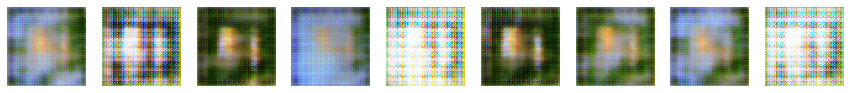

[  453  9140  8506  2513  7244  9049  4778 11272  6348]
0 Brewer_Blackbird_0066_2693.jpg
1 Warbling_Vireo_0102_158704.jpg
2 Elegant_Tern_0014_150523.jpg
3 Frigatebird_0069_43541.jpg
4 Le_Conte_Sparrow_0007_795148.jpg
5 Red_Eyed_Vireo_0041_156954.jpg
6 Ringed_Kingfisher_0039_71052.jpg
7 Red_Headed_Woodpecker_0066_183322.jpg
8 White_Necked_Raven_0070_102645.jpg
(9, 64, 64, 3)


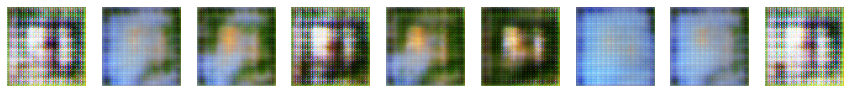

[ 3950  1946  7137 10388 11294  3073  1435  2083  6724]
0 Ruby_Throated_Hummingbird_0083_57397.jpg
1 Purple_Finch_0008_27455.jpg
2 Harris_Sparrow_0025_116648.jpg
3 Prairie_Warbler_0091_172597.jpg
4 Red_Headed_Woodpecker_0101_182538.jpg
5 Western_Grebe_0090_36182.jpg
6 Bronzed_Cowbird_0032_796233.jpg
7 Acadian_Flycatcher_0031_795582.jpg
8 Brewer_Sparrow_0031_796712.jpg
(9, 64, 64, 3)


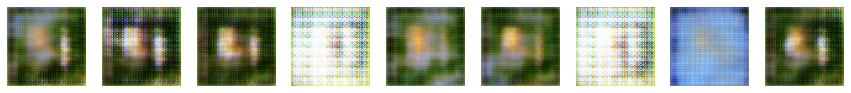

[ 7446  9682  4888  1694  2995  2318 11119  9530  1635]
0 Savannah_Sparrow_0058_118323.jpg
1 Cerulean_Warbler_0083_163380.jpg
2 Red_Legged_Kittiwake_0020_795439.jpg
3 Fish_Crow_0067_26124.jpg
4 Pied_Billed_Grebe_0065_35713.jpg
5 Scissor_Tailed_Flycatcher_0031_41836.jpg
6 Pileated_Woodpecker_0125_179971.jpg
7 Canada_Warbler_0035_162377.jpg
8 American_Crow_0116_25199.jpg
(9, 64, 64, 3)


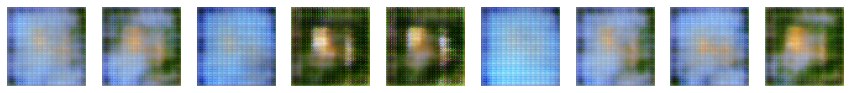

[ 7691  7928  7534 11611  7402  8223  9101  8142  6610]
0 Vesper_Sparrow_0051_125587.jpg
1 Bank_Swallow_0032_129491.jpg
2 Seaside_Sparrow_0066_120791.jpg
3 Marsh_Wren_0033_188778.jpg
4 Nelson_Sharp_Tailed_Sparrow_0056_117974.jpg
5 Summer_Tanager_0050_139358.jpg
6 Warbling_Vireo_0017_158271.jpg
7 Scarlet_Tanager_0008_137607.jpg
8 Baird_Sparrow_0020_106863.jpg
(9, 64, 64, 3)


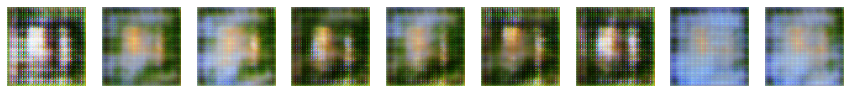

[ 4289  2383  6062  5954  6924  1601 11102  6123  7002]
0 Florida_Jay_0025_64673.jpg
1 Vermilion_Flycatcher_0028_42197.jpg
2 American_Pipit_0002_100023.jpg
3 Western_Wood_Pewee_0017_795041.jpg
4 House_Sparrow_0108_112963.jpg
5 American_Crow_0030_25092.jpg
6 Pileated_Woodpecker_0088_180054.jpg
7 Whip_Poor_Will_0003_796409.jpg
8 Fox_Sparrow_0012_115324.jpg
(9, 64, 64, 3)


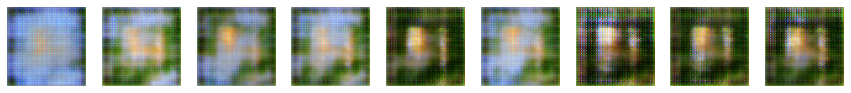

[ 2954 11026  5791  1373 10957   712  5701  9933  2341]
0 Horned_Grebe_0100_34462.jpg
1 American_Three_Toed_Woodpecker_0017_179830.jpg
2 Ovenbird_0046_92821.jpg
3 Pelagic_Cormorant_0037_23889.jpg
4 Cedar_Waxwing_0011_179149.jpg
5 Bobolink_0112_11073.jpg
6 Orchard_Oriole_0098_91401.jpg
7 Magnolia_Warbler_0004_165535.jpg
8 Scissor_Tailed_Flycatcher_0096_41733.jpg
(9, 64, 64, 3)


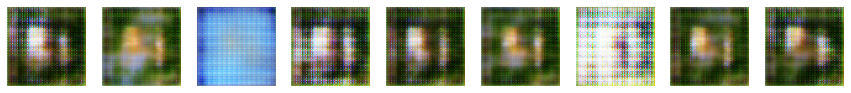

[ 9635 10534  7992  6718  4502  1742  4327  8480  2836]
0 Cerulean_Warbler_0004_797199.jpg
1 Tennessee_Warbler_0009_174937.jpg
2 Barn_Swallow_0050_130095.jpg
3 Brewer_Sparrow_0023_107489.jpg
4 Tropical_Kingbird_0095_69482.jpg
5 Black_Billed_Cuckoo_0062_795309.jpg
6 Florida_Jay_0100_64645.jpg
7 Common_Tern_0083_148096.jpg
8 Boat_Tailed_Grackle_0116_33808.jpg
(9, 64, 64, 3)


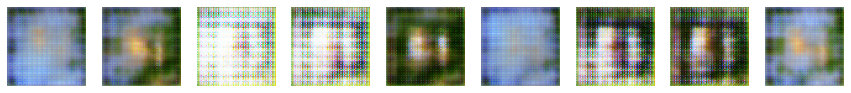

[ 9289  3351  4490  8204 11458  8706  8074 10132  4231]
0 Bay_Breasted_Warbler_0039_797152.jpg
1 Pigeon_Guillemot_0053_39876.jpg
2 Tropical_Kingbird_0067_69792.jpg
3 Summer_Tanager_0010_139948.jpg
4 Cactus_Wren_0085_185515.jpg
5 Green_Tailed_Towhee_0046_154967.jpg
6 Cliff_Swallow_0094_133114.jpg
7 Nashville_Warbler_0044_167357.jpg
8 Blue_Jay_0029_62199.jpg
(9, 64, 64, 3)


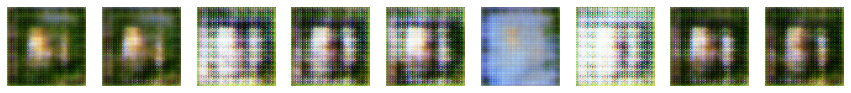

[  65 4245 7555 1240 7197 3975 8966 5625 5520]
0 Laysan_Albatross_0005_565.jpg
1 Blue_Jay_0054_61656.jpg
2 Song_Sparrow_0042_121314.jpg
3 Brandt_Cormorant_0006_22925.jpg
4 Henslow_Sparrow_0031_796594.jpg
5 Rufous_Hummingbird_0006_59621.jpg
6 Blue_Headed_Vireo_0116_156049.jpg
7 Hooded_Oriole_0075_90788.jpg
8 White_Breasted_Nuthatch_0114_86554.jpg
(9, 64, 64, 3)


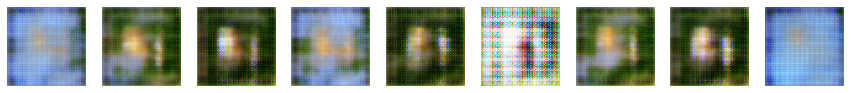

In [ ]:
#
from keras.preprocessing.image import array_to_img

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy import asarray
import numpy as np

import os
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from numpy.random import random
from tensorflow.keras import layers
from tensorflow.keras import Model
from numpy.random import randn
from numpy.random import randint
import time
import matplotlib.pyplot as pyplot
from keras.preprocessing.image import array_to_img
from numpy import linspace
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from numpy.random import randint
import numpy as np

def create_sent_vector(sent):
  result_array = np.empty((0, 300))

  for word in word_tokenize(sent):
    result_array = np.append(result_array, [model[word]], axis=0)
  final = np.mean(result_array, axis=0).astype('float32')
  return final

def generate_random_word_vectors_from_dataset(n_samples, create_new_captions = False):

  if create_new_captions:
      e = create_sent_vector('This bird has  white breast with brown feathers')
      f = create_sent_vector('This bird has  white breast with blue feathers')
      v = []
      flag = False
      for i in range(n_samples):

        if not flag:
          v.append(f)
          flag = True
        elif flag:
          v.append(e)
          flag = False
      return np.asarray(v), np.asarray([])
  else:
    ix = randint(0,len(captions), n_samples)
    print(ix)
    return  np.asarray(captions)[ix], np.asarray(labels)[ix]

def generate_images(model, test_input):

  predictions = model(test_input, training=False)

  print(predictions.shape)
  pyplot.figure(figsize=[15, 15])
  for i in range(predictions.shape[0]):
      pyplot.subplot(1, 9, i+1)
      pyplot.imshow(array_to_img(predictions.numpy()[i]))
      pyplot.axis('off')

  pyplot.show()

# Credit to: https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/
def interpolate_points(p1, p2, n_steps=9):
	ratios = linspace(0, 1, num=n_steps)
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return np.asarray(vectors)

def generate_latent_points(latent_dim, n_samples, interpolate = False):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions, labels = generate_random_word_vectors_from_dataset(n_samples, create_new_captions=False)
    if interpolate:
      text_captions = interpolate_points(text_captions[0], text_captions[1])
      x_input = interpolate_points(x_input[0], x_input[1])
    for index, s in enumerate(labels.flat):
      print(index, s)

    return [x_input, text_captions]

gen_model = tf.keras.models.load_model(folder+'/46stage_new_gan_animal_model.h5')

for i in range(40):
  generate_images(gen_model, generate_latent_points(100, 9))


In [ ]:
def get_index_by_label(label):
  for idx, l in enumerate(labels):
    if l in label:
      return idx


print(get_index_by_label('Western_Wood_Pewee_0061_795060.jpg'))

5987


# Final Model Outputs

In [ ]:
gen_model = tf.keras.models.load_model('bird_model.h5')

for i in range(40):
  generate_images(gen_model, generate_latent_points(100, 9))